In [54]:
from sklearn.datasets import california_housing
from math import sqrt
from altair import Chart,RegressionChart
import pandas as pd

ImportError: cannot import name 'RegressionChart'

In [2]:
housing = california_housing.fetch_california_housing()

In [4]:
housing['data'][:2]

array([[  8.32520000e+00,   4.10000000e+01,   6.98412698e+00,
          1.02380952e+00,   3.22000000e+02,   2.55555556e+00,
          3.78800000e+01,  -1.22230000e+02],
       [  8.30140000e+00,   2.10000000e+01,   6.23813708e+00,
          9.71880492e-01,   2.40100000e+03,   2.10984183e+00,
          3.78600000e+01,  -1.22220000e+02]])

In [5]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [34]:
x = [i[0] for i in housing['data']]
y = housing['target']

In [40]:
data = pd.DataFrame({'MedInc':x,'target':y})

In [33]:
def mean(v):
    return sum(v)/len(v)

def dot(v,w):
    """ compute component wise product of two vectors """
    return sum(v_i * w_i for v_i,w_i in zip(v,w))

def de_mean(x):
    """ get distance from mean for a vector """
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

def standard_deviation(x):
    return sqrt(variance(x))

def covariance(x,y):
    n = len(x)
    return (dot(de_mean(x),de_mean(y))) / (n-1)

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0

def predict(alpha,beta, x_i):
    return alpha + (beta * x_i)

def error(alpha,beta,x_i,y_i):
    return y_i - predict(alpha,beta,x_i)

def sum_of_squared_errors(alpha,beta,x,y):
    return sum(error(alpha,beta,x_i,y_i)**2 for x_i,y_i in zip(x,y))

def least_squares_fit(x,y):
    beta = correlation(x,y) * standard_deviation(y)/standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha,beta

def sum_of_squares(v):
    # TODO
    return dot(v,v)

def total_sum_of_squares(v):
    return sum(i ** 2 for i in de_mean(v))

def r_squared(alpha,beta,x,y):
    return 1.0 - (sum_of_squared_errors(alpha,beta,x,y))/total_sum_of_squares(y)

In [38]:
alpha,beta = least_squares_fit(x,y)
r_squared(alpha,beta,x,y)

0.47344749180720991

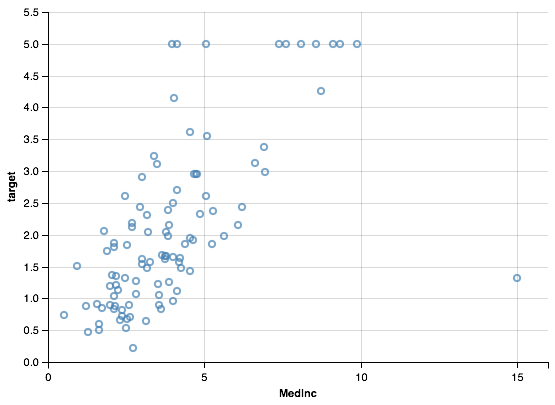

In [45]:
Chart(data.sample(100)).mark_point().encode(
    x='MedInc',
    y='target',
)

In [51]:
c = Chart(data.sample(100)).mark_line()

In [52]:
c